In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import os

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
db_path = os.path.join("Resources","hawaii.sqlite")
engine = create_engine(f"sqlite:///{db_path}")
con = engine.connect()

In [5]:
# reflect an existing database into a new model
HI_base = automap_base()
HI_base.metadata.create_all(con)

# reflect the tables
HI_base.prepare(con, reflect=True)

In [6]:
# View all of the classes that automap found
HI_base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
hi_meas = HI_base.classes.measurement
hi_stati = HI_base.classes.station

In [8]:
#inspecting types
inspector = inspect(con)
hi_meas_col = inspector.get_columns("measurement")
hi_stati_col = inspector.get_columns("station")

In [9]:
#print measurement columns
for column in hi_meas_col:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#print station columns
for column in hi_stati_col:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
# Create our session (link) from Python to the DB
session = Session(bind=con)
session

# Exploratory Precipitation Analysis

In [12]:
# Find the most recent date in the data set.
meas_db = pd.read_sql_query("select * from measurement", con)
date_sort = meas_db.sort_values("date", ascending=False)
date_sort["dateind"] = pd.to_datetime(date_sort["date"])
date_sort = date_sort.set_index("dateind")
date_sort

,id,station,date,prcp,tobs
dateind,,,,,
2017-08-23,19550,USC00516128,2017-08-23,0.45,76.0
2017-08-23,12187,USC00519523,2017-08-23,0.08,82.0
2017-08-23,2724,USC00519397,2017-08-23,0.00,81.0
2017-08-23,7635,USC00514830,2017-08-23,0.00,82.0
2017-08-22,12186,USC00519523,2017-08-22,0.00,82.0
...,...,...,...,...,...
2010-01-01,14960,USC00511918,2010-01-01,0.05,66.0
2010-01-01,12188,USC00519281,2010-01-01,0.15,70.0
2010-01-01,9519,USC00519523,2010-01-01,0.15,75.0


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = date_sort.sort_index().last('365D')
year_prec = last_year.drop(['id', 'station', 'tobs'], axis=1)

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date
# year_prec = year_prec.groupby(year_prec.index.date)['prcp'].sum().reset_index()
# year_prec["date"] = year_prec["index"].astype(str)
year_prec

,date,prcp
dateind,,
2016-08-24,2016-08-24,0.08
2016-08-24,2016-08-24,2.28
2016-08-24,2016-08-24,NaN
2016-08-24,2016-08-24,1.22
2016-08-24,2016-08-24,1.45
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

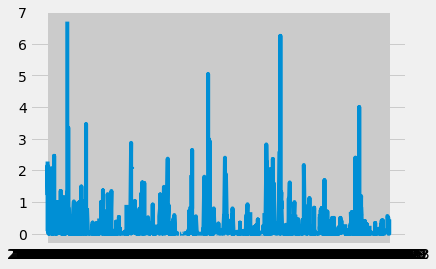

In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(year_prec["date"],year_prec["prcp"])
plt.show

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_prec["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

# Exploratory Station Analysis

In [16]:
# Design a query to calculate the total number stations in the dataset
meas_db["station"].nunique()

9

In [17]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
meas_db.groupby("station").count().sort_values(["id"], ascending=False)

,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [18]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
act_stat = meas_db.loc[meas_db["station"] =='USC00519281']
act_stat["tobs"].describe()

count    2772.000000
mean       71.663781
std         4.357642
min        54.000000
25%        69.000000
50%        72.000000
75%        74.000000
max        85.000000
Name: tobs, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

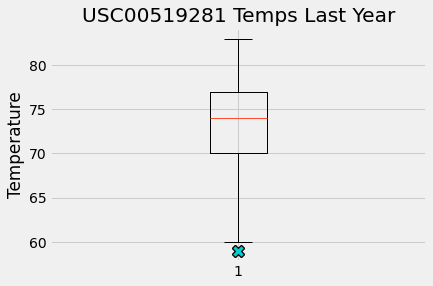

In [19]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
act_stat_1yr = last_year.loc[last_year["station"] =='USC00519281'].reset_index()
act_stat_1yr = act_stat_1yr.drop(['id', 'station', 'prcp', 'dateind'], axis=1)
act_stat_1yr

fig1, ax1 = plt.subplots()
ax1.set_title("USC00519281 Temps Last Year")
ax1.set_ylabel("Temperature")
ax1.boxplot(act_stat_1yr["tobs"], 
            flierprops={'marker': 'X', 'markersize': 12, 'markerfacecolor': '#00CED1'})

plt.show

# Close session

In [20]:
# Close Session
session.close()